In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [6]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Gebruiker\Documents\Pubmed_Data_Analysis


In [25]:
file_path = "C:/Users/Gebruiker/Documents/Pubmed_Data_Analysis/Data/API/vitamin_d_results_api_20250214_200006.csv"
df = pd.read_csv(file_path)
df['Abstract'] = df['Abstract'].fillna("No abstract available")
df['Keywords'] = df['Keywords'].fillna("No MESH terms available")
df.head()

,PMID,Title,Abstract,Authors,Journal,Keywords,URL,Affiliations
0,39946202,Comparison of effect and mechanism between nal...,Pruritus in hemodialysis patients (HDP) is one...,"Choi Sooyeon, Shin Dong Hui, Kim Jae-Seok, Lee...",Annals of medicine,"Humans, Pruritus, Renal Dialysis, Ultraviolet ...",https://www.ncbi.nlm.nih.gov/pubmed/39946202,"Department of Dermatology, Yonsei University, ..."
1,39940457,Vitamin D Deficiency Meets Hill's Criteria for...,Clinical trials consistently demonstrate an in...,Wimalawansa Sunil J,Nutrients,"Humans, COVID-19, Vitamin D Deficiency, Vitami...",https://www.ncbi.nlm.nih.gov/pubmed/39940457,"Endocrinology and Human Nutrition, CardioMetab..."
2,39940396,The Immunomodulatory Activity of High Doses of...,Vitamin D receptor [VDR] expression promotes L...,"Gonçalves Ana Moura, Velho Sónia, Rodrigues Bá...",Nutrients,"Humans, Male, Female, Middle Aged, COVID-19, V...",https://www.ncbi.nlm.nih.gov/pubmed/39940396,"Intensive Care Medicine Department, Hospital B..."
3,39940277,Effects of a Novel Dispersible Supplement Cont...,Vitamins D and B12 play a crucial role in main...,"Angelopoulos Nikolaos, Paparodis Rodis D, Andr...",Nutrients,"Humans, Vitamin D, Middle Aged, Dietary Supple...",https://www.ncbi.nlm.nih.gov/pubmed/39940277,"Hellenic Endocrine Network, Ermou 6 Str., 1056..."
4,39940233,Food Group Consumption and Nutrient Intake by ...,Optimal nutrition is essential for the health ...,"Jin Ying, Coad Jane, Brough Louise",Nutrients,"Humans, Female, Breast Feeding, Adult, New Zea...",https://www.ncbi.nlm.nih.gov/pubmed/39940233,"School of Health Sciences, College of Health, ..."


In [46]:
vectorizer_abstracts = TfidfVectorizer(stop_words='english')
vectorizer_titles = TfidfVectorizer(stop_words='english')
vectorizer_keywords = TfidfVectorizer(stop_words='english')

vectorized_abstracts = vectorizer_abstracts.fit_transform(df['Abstract'])
vectorized_titles = vectorizer_titles.fit_transform(df['Title'])
vectorized_keywords = vectorizer_keywords.fit_transform(df['Keywords'])

In [ ]:
# Elbow method

Running KMeans: 100%|█████████████████████████████████████████████████████████████| 20/20 [06:46<00:00, 20.32s/cluster]


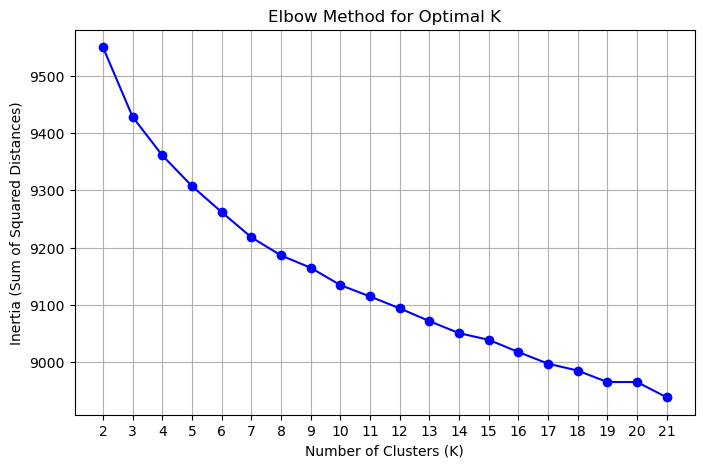

In [17]:
# Elbow method on abstracts
k_values = range(2, 22)  
inertia = []

for k in tqdm(k_values, desc="Running KMeans", unit="cluster"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vectorized_abstracts)
    inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [47]:
# Get top 5 keywords for abstract clusters
# Apply K-Means
kmeans_abstracts = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans_abstracts.fit(vectorized_abstracts)

feature_names_abstracts = vectorizer_abstracts.get_feature_names_out()

# Get top 5 words per cluster
num_words = 5
for i, centroid in enumerate(kmeans_abstracts.cluster_centers_):
    top_indices = centroid.argsort()[-num_words:][::-1]
    top_words = [feature_names_abstracts[idx] for idx in top_indices]
    print(f"Cluster {i}: {', '.join(top_words)}")

Cluster 0: iu, 25, vitamin, oh, ng
Cluster 1: sub, vitamin, 25, oh, sup
Cluster 2: insulin, glucose, vitamin, ir, resistance
Cluster 3: pregnancy, maternal, women, vitamin, birth
Cluster 4: bone, bmd, spine, mineral, calcium
Cluster 5: 25ohd, nmol, vitamin, levels, serum
Cluster 6: abstract, available, ₂d₃, ₂d₂, ₂d
Cluster 7: children, vitamin, 25, deficiency, oh
Cluster 8: patients, pth, ckd, calcium, paricalcitol
Cluster 9: vitamin, patients, levels, studies, deficiency
Cluster 10: oh, 25, vitamin, serum, nmol
Cluster 11: cancer, breast, risk, prostate, vitamin
Cluster 12: il, inflammatory, vitamin, tnf, cytokines
Cluster 13: vdr, polymorphisms, polymorphism, foki, bsmi
Cluster 14: vitamin, group, placebo, supplementation, patients
Cluster 15: asthma, vd, vitamin, children, levels
Cluster 16: fracture, fractures, hip, osteoporosis, risk
Cluster 17: covid, 19, patients, vitamin, mortality
Cluster 18: 95, ci, vitamin, studies, meta
Cluster 19: psoriasis, topical, calcipotriol, treatmen

Running KMeans: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:39<00:00,  1.96s/cluster]


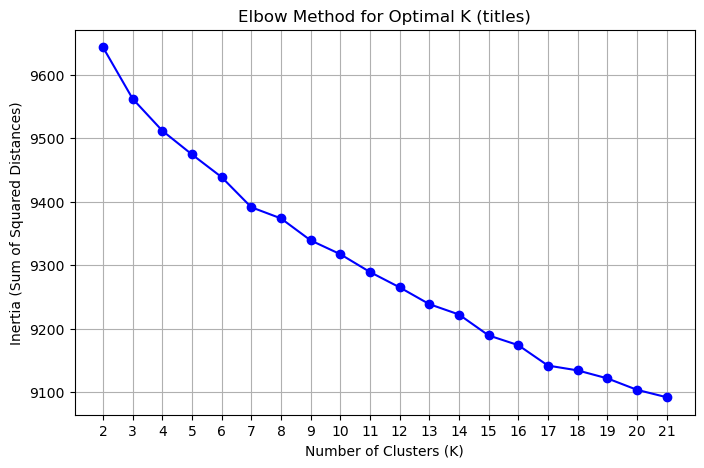

In [31]:
# Elbow method on titles
k_values2 = range(2, 22)  
inertia2 = []

for k in tqdm(k_values2, desc="Running KMeans", unit="cluster"):
    kmeans_titles = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_titles.fit(vectorized_titles)
    inertia2.append(kmeans_titles.inertia_)  # Store inertia (sum of squared distances)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values2, inertia2, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K (titles)")
plt.xticks(k_values2)
plt.grid(True)
plt.show()

In [48]:
# Get top 5 keywords for title clusters
# Apply K-Means
kmeans_titles = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans_titles.fit(vectorized_titles)

feature_names_titles = vectorizer_titles.get_feature_names_out()

# Get top 5 words per cluster
num_words = 5
for i, centroid in enumerate(kmeans_titles.cluster_centers_):
    top_indices = centroid.argsort()[-num_words:][::-1]
    top_words = [feature_names_titles[idx] for idx in top_indices]
    print(f"Cluster {i}: {', '.join(top_words)}")


Cluster 0: vitamin, patients, deficiency, treatment, bone
Cluster 1: fractures, falls, older, prevention, people
Cluster 2: double, blind, placebo, controlled, randomized
Cluster 3: receptor, polymorphisms, gene, meta, analysis
Cluster 4: covid, 19, review, vitamin, systematic
Cluster 5: chronic, kidney, disease, patients, vitamin
Cluster 6: review, systematic, vitamin, literature, health
Cluster 7: trial, randomized, controlled, vitamin, supplementation
Cluster 8: levels, serum, vitamin, oh, 25
Cluster 9: hydroxyvitamin, 25, serum, levels, concentrations
Cluster 10: study, observational, vitamin, prospective, patients
Cluster 11: sub, vitamin, trial, randomized, supplementation
Cluster 12: studies, meta, analysis, observational, risk
Cluster 13: women, postmenopausal, bone, calcium, vitamin
Cluster 14: supplementation, vitamin, status, effect, children
Cluster 15: bone, density, mineral, women, calcium
Cluster 16: polycystic, ovary, syndrome, women, vitamin
Cluster 17: trials, meta, r

Running KMeans: 100%|█████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.80s/cluster]


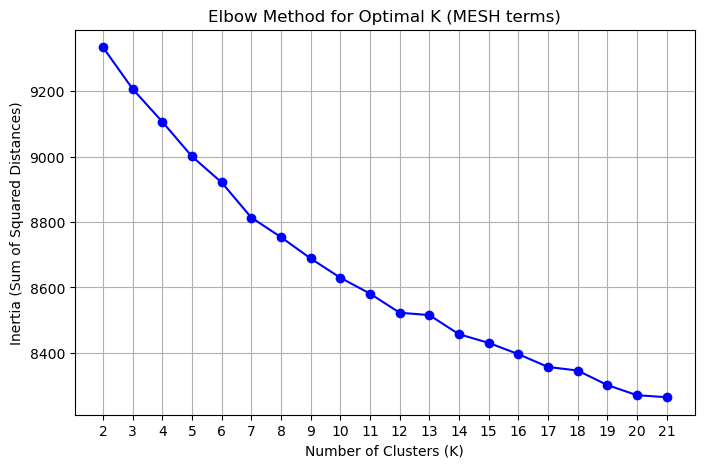

In [30]:
#Elbow method on MESH terms
k_values3 = range(2, 22)  
inertia3 = []

for k in tqdm(k_values3, desc="Running KMeans", unit="cluster"):
    kmeans_keywords = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_keywords.fit(vectorized_keywords)
    inertia3.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values3, inertia3, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K (MESH terms)")
plt.xticks(k_values3)
plt.grid(True)
plt.show()

In [49]:
# Get top 5 keywords for MESH term clusters
# Apply K-Means
kmeans_keywords = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans_keywords.fit(vectorized_keywords)

feature_names_keywords = vectorizer_keywords.get_feature_names_out()

# Get top 5 words per cluster
num_words = 5
for i, centroid in enumerate(kmeans_keywords.cluster_centers_):
    top_indices = centroid.argsort()[-num_words:][::-1]
    top_words = [feature_names_keywords[idx] for idx in top_indices]
    print(f"Cluster {i}: {', '.join(top_words)}")



Cluster 0: risk, factors, studies, vitamin, aged
Cluster 1: aged, adult, studies, middle, vitamin
Cluster 2: mellitus, diabetes, type, vitamin, aged
Cluster 3: genetic, polymorphism, receptors, predisposition, calcitriol
Cluster 4: method, blind, double, aged, vitamin
Cluster 5: humans, vitamin, adult, female, male
Cluster 6: infant, newborn, pregnancy, vitamin, premature
Cluster 7: renal, chronic, dialysis, aged, fibroblast
Cluster 8: bone, density, aged, osteoporosis, conservation
Cluster 9: body, mass, index, obesity, aged
Cluster 10: covid, 19, cov, sars, vitamin
Cluster 11: terms, mesh, available, zoster, zoo
Cluster 12: child, preschool, infant, vitamin, adolescent
Cluster 13: dose, response, relationship, drug, aged
Cluster 14: pregnancy, vitamin, complications, female, adult
Cluster 15: trials, topic, randomized, controlled, dietary
Cluster 16: vitamin, vitamins, dietary, deficiency, supplements
Cluster 17: muscle, strength, skeletal, aged, dietary
Cluster 18: liquid, chromatog